In [1]:
#importing Libraries
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [2]:
#Defining file path
file_to_load = 'Resources/clean_data.csv'
data = pd.read_csv(file_to_load)

In [3]:
#Getting the columns needed for the analysis
cleanedData = data.loc[:, ['Reported_Date', 'Description']]

In [4]:
#Converting reported date field to type datetime
cleanedData['Reported_Date'] = pd.to_datetime(cleanedData['Reported_Date'], errors='coerce')

# Total Number of Crimes by Month

In [5]:
#Getting the total number of crimes that took place in each month,
#got the code from https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas
totalByMonth = cleanedData.groupby(cleanedData['Reported_Date'].dt.strftime('%B'))['Reported_Date'].count()
totalByMonth

Reported_Date
April        10418
August       11746
December      9417
February      8877
January      10191
July         11489
June         11487
March        10796
May          11693
November      9955
October      11990
September    10879
Name: Reported_Date, dtype: int64

In [6]:
#Converting the series to a dataframe to make user friendly to work with
totalByMonth_df = pd.DataFrame(totalByMonth)

In [7]:
#sorting the dataframe to list the results in sorted manner,
#got the code from https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
         'November', 'December']
totalByMonth_df.index = pd.CategoricalIndex(totalByMonth_df.index, categories=months, ordered=True)
totalByMonth_df = totalByMonth_df.sort_index()

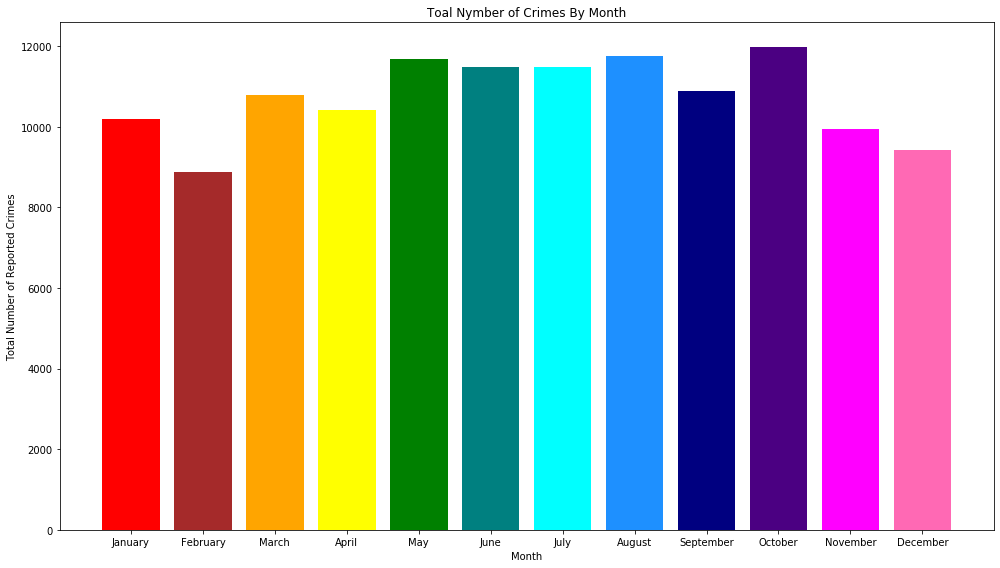

In [8]:
#Creating the plot to represent the data
colors =['red', 'brown', 'orange', 'yellow', 'green', 'teal', 'cyan', 'dodgerblue', 'navy', 'indigo', 'magenta','hotpink']
fig, ax = plt.subplots(figsize=(14,8))
totalCrimes = plt.bar(x = totalByMonth_df.index, height= totalByMonth_df['Reported_Date'], color=colors)
plt.title("Toal Nymber of Crimes By Month")
plt.xlabel('Month')
plt.ylabel('Total Number of Reported Crimes')
plt.tight_layout()
plt.show()

# Types of Crimes by Month

In [9]:
copy = cleanedData
copy['Reported_Date'] = pd.to_datetime(copy['Reported_Date'], errors='coerce')
copy['Month'] =  copy['Reported_Date'].dt.strftime('%B')
copy

,Reported_Date,Description,Month
0,2018-09-02,Burglary - Residence,September
1,2018-01-31,Forgery,January
2,2018-01-30,Sex Off Fondle - mol,January
3,2018-01-30,Burglary - Residence,January
4,2018-12-08,Property Damage,December
...,...,...,...
128933,2018-12-23,HOMICIDE/Non Neglige,December
128934,2018-12-27,Stealing Shoplifting,December
128935,2018-12-29,Burglary - Residence,December
128936,2018-12-25,Non Agg Assault Dome,December


In [15]:
typesofCrime = cleanedData.groupby(['Month','Description'])['Reported_Date'].count()
typesofCrime

Month      Description         
April      Agg Assault               4
           Agg Assault - Domest    238
           Agg Assault - Drive-     52
           Aggravated Assault (    594
           Armed Robbery           193
                                  ... 
September  Trespassing             313
           Violation Ex Parte O     36
           Violation Full Order     68
           Weapons Law Violatio     74
           Wire Fraud               24
Name: Reported_Date, Length: 923, dtype: int64

In [16]:
type(typesofCrime)

pandas.core.series.Series

In [27]:
crime = pd.DataFrame(typesofCrime)
crime

Reported_Date
Month     Description                        
April     Agg Assault                       4
          Agg Assault - Domest            238
          Agg Assault - Drive-             52
          Aggravated Assault (            594
          Armed Robbery                   193
...                                       ...
September Trespassing                     313
          Violation Ex Parte O             36
          Violation Full Order             68
          Weapons Law Violatio             74
          Wire Fraud                       24

[923 rows x 1 columns]

In [28]:
month = crime['Month']
for num, month in enumerate(month):
    values = list(crime[crime['Month'] == month].loc[:, 'Value'])

    crime[crime['Month'] == month].plot.bar(x=crime['Description'],y=crime['Reported_Date'], ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values
plt.show()

KeyError: 'Month'